<h1 style="text-align: center; font-size: 32px;">
<strong>Modèle IA pour la prédiction de la Compatibilité Peau–Produit Cosmétique par Analyse des Ingrédients</strong>
</h1>

<p style="text-align: center; font-size: 18px;">
Réalisé par : Hajar ELKASIRI et Hiba EL OUERKHAOUI <br>
Encadré par : Pr. Youness TABII
</p>

### 1. **Chargement et exploration initiale des données**

Cette cellule importe les bibliothèques nécessaires, charge le fichier `final_cosmetics_data.csv`, et affiche les premières statistiques : types de données, valeurs manquantes, distribution des propriétés (ex. : `Oily`, `Sensitive`, etc.), corrélations entre ces propriétés, et la longueur des listes d’ingrédients. Elle inclut aussi des visualisations (barplot, heatmap, histogramme).

Infos sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             1472 non-null   object
 1   Brand             1472 non-null   object
 2   Name              1472 non-null   object
 3   Ingredients       1472 non-null   object
 4   Oily              1472 non-null   bool  
 5   Dry               1472 non-null   bool  
 6   Sensitive         1472 non-null   bool  
 7   Combination       1472 non-null   bool  
 8   Normal            1472 non-null   bool  
 9   Alcohol-Free      1472 non-null   bool  
 10  Fungal Acne Safe  1472 non-null   bool  
 11  Acne-Prone Safe   1472 non-null   bool  
dtypes: bool(8), object(4)
memory usage: 57.6+ KB
None

Valeurs manquantes par colonne :
Label               0
Brand               0
Name                0
Ingredients         0
Oily                0
Dry                 0
Sens

C:\Users\eloue\AppData\Local\Temp\ipykernel_17492\3751349601.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_categories.index, y=df_categories.values, palette="Set2")


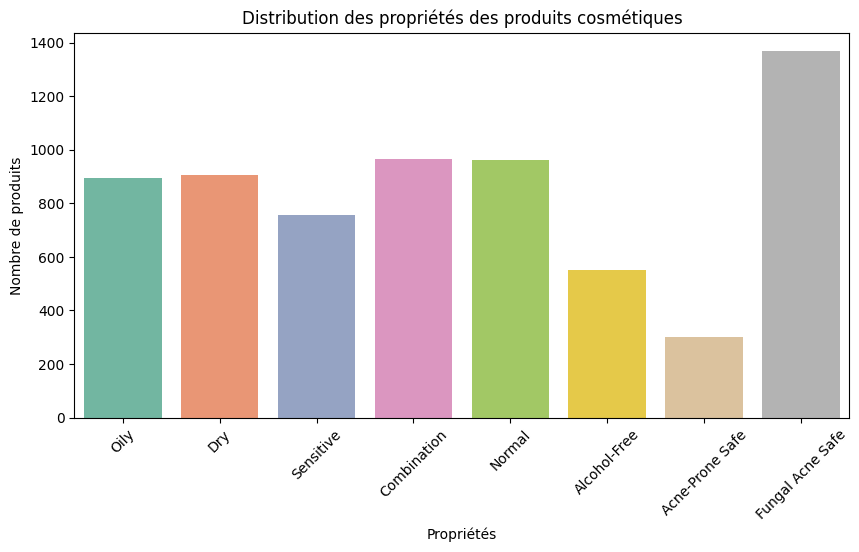


Matrice de corrélation (produits avec <4 types de peau)


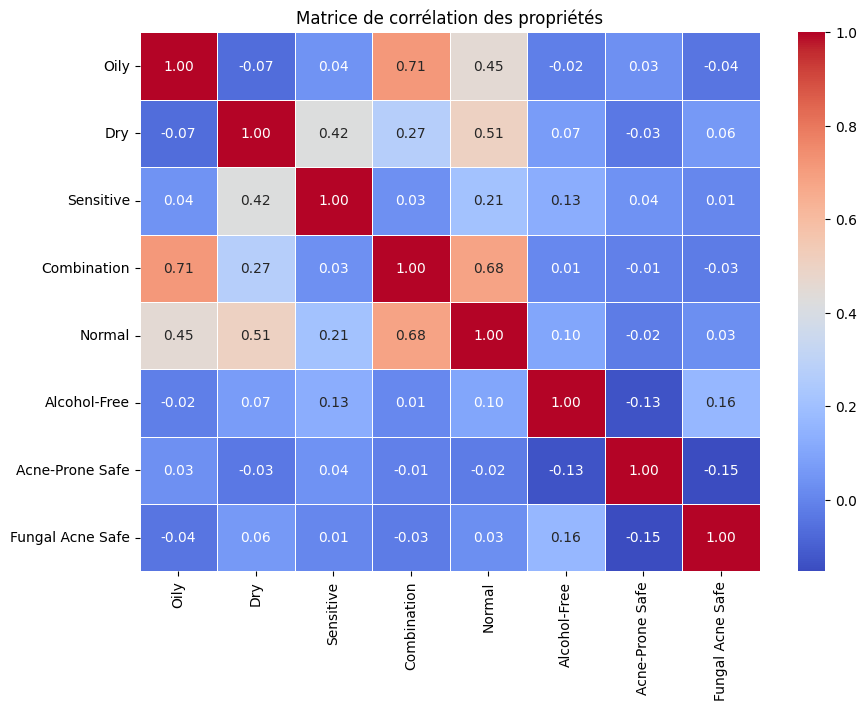

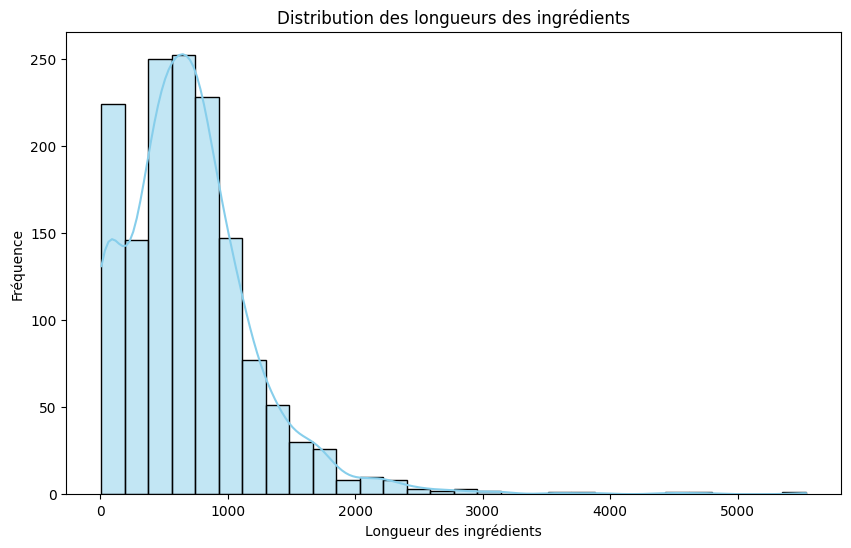


Statistiques descriptives :
       skin_type_sum  Ingredients_length
count    1472.000000         1472.000000
mean        3.043478          701.610054
std         2.208570          533.033326
min         0.000000            7.000000
25%         0.000000          374.500000
50%         4.000000          649.500000
75%         5.000000          933.250000
max         5.000000         5535.000000


In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
file_path = "final_cosmetics.csv"
df = pd.read_csv(file_path, delimiter=';')

# Aperçu des premières lignes des données
df.head()

# Vérifier les types de données et les valeurs manquantes
print("Infos sur les données :")
print(df.info())

print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Afficher la distribution des propriétés
print("\nDistribution des propriétés")
df_categories = df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                    "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_categories.index, y=df_categories.values, palette="Set2")
plt.title("Distribution des propriétés des produits cosmétiques")
plt.xlabel("Propriétés")
plt.ylabel("Nombre de produits")
plt.xticks(rotation=45)
plt.show()

# === Filtrage uniquement pour la matrice de corrélation ===
skin_types = ["Oily", "Dry", "Sensitive", "Combination", "Normal"]
df['skin_type_sum'] = df[skin_types].sum(axis=1)
df_filtered = df[df['skin_type_sum'] < 4]

# Visualisation de la corrélation entre les propriétés avec un heatmap (sur df filtré)
print("\nMatrice de corrélation (produits avec <4 types de peau)")
corr = df_filtered[skin_types + ["Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des propriétés")
plt.show()

# Distribution des longueurs des ingrédients
df['Ingredients_length'] = df['Ingredients'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingredients_length'], kde=True, color="skyblue", bins=30)
plt.title("Distribution des longueurs des ingrédients")
plt.xlabel("Longueur des ingrédients")
plt.ylabel("Fréquence")
plt.show()

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())


In [ ]:
# Pour vérifier combien de produits sont adaptés pour combien de types de peaux (0: pour 0 types de peaux (si false dans la colonne pour tous les types de peaux qu'on a), 1: pour 1 type de peau...)
df[["Oily", "Dry", "Sensitive", "Combination", "Normal"]].sum(axis=1).value_counts()

5    662
0    471
4    215
3     69
2     48
1      7
Name: count, dtype: int64

### 2. **Visualisation des ingrédients avec un nuage de mots**

Ici, on regroupe tous les ingrédients dans un seul texte, puis on crée un nuage de mots (`wordcloud`) pour visualiser les ingrédients les plus fréquents dans le dataset.

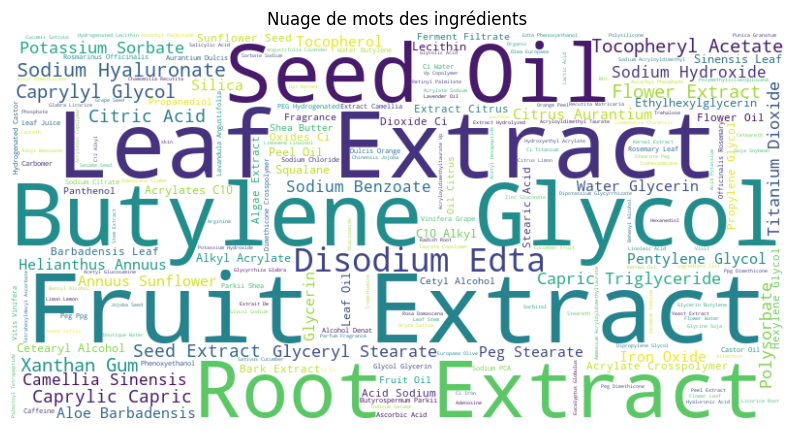

In [12]:
from wordcloud import WordCloud

# Fusionner tous les ingrédients en une seule chaîne de caractères
text = ' '.join(df['Ingredients'].dropna())

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des ingrédients")
plt.show()

### 3. **Boxplot des propriétés cosmétiques**

Cette cellule génère un boxplot pour visualiser la distribution de chaque propriété booléenne (comme `Oily`, `Dry`, `Alcohol-Free`, etc.), ce qui permet de voir comment ces valeurs sont réparties dans le dataset.

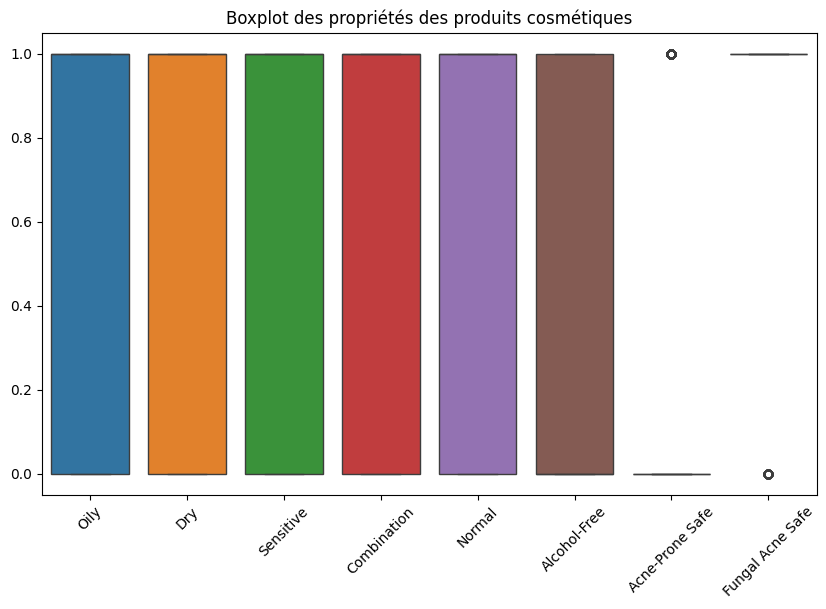

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                     "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]])
plt.title("Boxplot des propriétés des produits cosmétiques")
plt.xticks(rotation=45)
plt.show()

### 4. **Top 20 des ingrédients les plus fréquents**

On découpe la colonne `Ingredients`, puis on compte les ingrédients les plus souvent utilisés. Le graphique en barres horizontales affiche les 20 premiers.

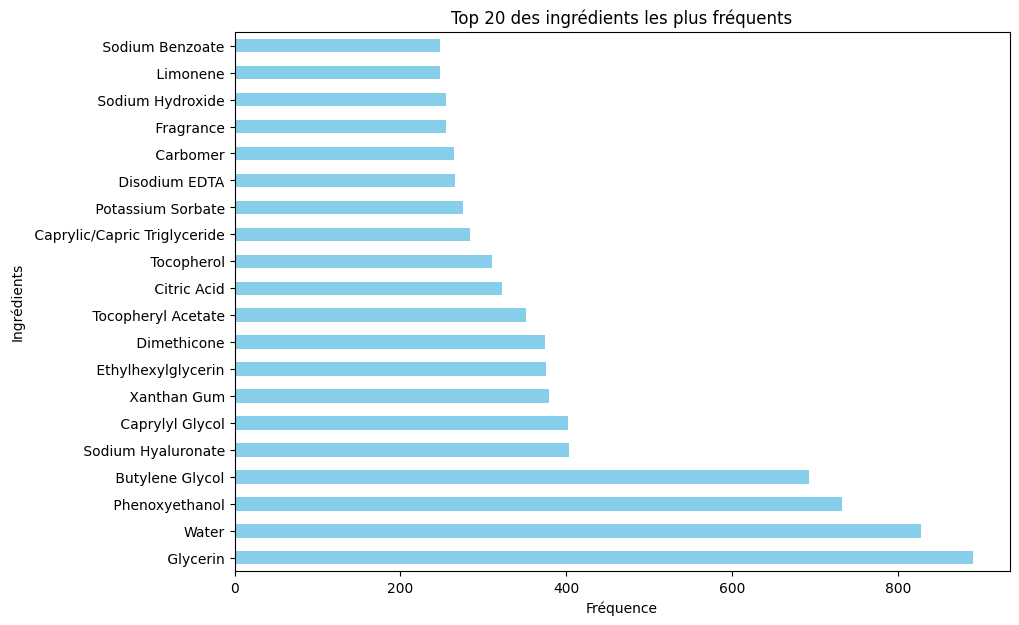

In [5]:
ingredient_count = df['Ingredients'].str.split(',').explode().value_counts().head(20)
ingredient_count.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.title("Top 20 des ingrédients les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Ingrédients")
plt.show()

### 5. **Vectorisation des ingrédients avec TF-IDF**

Cette cellule transforme le texte des ingrédients en vecteurs numériques (TF-IDF), limités à 500 mots les plus importants, afin de préparer les données pour l'entraînement d'un modèle de machine learning.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)  # 500 features max pour limiter la complexité
X_tfidf = vectorizer.fit_transform(df["Ingredients"])

# Vérification de la taille du résultat
print(X_tfidf.shape)  # (1472, 500)

(1472, 500)


### 6. **Séparation des données en entraînement et test**

On divise les données vectorisées en deux parties : une pour l'entraînement du modèle (`X_train`, `y_train`) et une pour le test (`X_test`, `y_test`) avec 20 % des données pour le test.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                                                                  "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]],
                                                    test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1177, 500), Test: (295, 500)


### 7. **Entraînement de plusieurs modèles multi-sorties**

On entraîne différents modèles de classification (`Random Forest`, `SVM`, `KNN`, `Logistic Regression`, `XGBoost`) pour prédire plusieurs étiquettes à la fois (par exemple, si un produit est à la fois `Oily` et `Alcohol-Free`).

In [10]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    "SVM": MultiOutputClassifier(SVC(probability=True)),
    "KNN": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    "Logistic Regression": MultiOutputClassifier(LogisticRegression()),
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
}

# Entraînement de tous les modèles
for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    model.fit(X_train, y_train)
    print(f"{name} entraîné avec succès !")

Entraînement du modèle Random Forest...
Random Forest entraîné avec succès !
Entraînement du modèle SVM...
SVM entraîné avec succès !
Entraînement du modèle KNN...
KNN entraîné avec succès !
Entraînement du modèle Logistic Regression...
Logistic Regression entraîné avec succès !
Entraînement du modèle XGBoost...


C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:47:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:47:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:48:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

XGBoost entraîné avec succès !


### 8. **Évaluation des modèles**

Cette cellule utilise `classification_report` pour afficher la précision, le rappel et le F1-score de chaque modèle entraîné sur les données de test.

In [11]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== Évaluation du modèle : {name} ===")
    print(classification_report(y_test, y_pred))


=== Évaluation du modèle : Random Forest ===
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       174
           1       0.65      0.86      0.74       173
           2       0.66      0.70      0.68       150
           3       0.71      0.85      0.77       189
           4       0.71      0.90      0.79       190
           5       0.99      0.93      0.96       111
           6       1.00      0.94      0.97        64
           7       0.95      1.00      0.97       269

   micro avg       0.77      0.88      0.82      1320
   macro avg       0.79      0.88      0.83      1320
weighted avg       0.78      0.88      0.83      1320
 samples avg       0.76      0.89      0.76      1320



C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


=== Évaluation du modèle : SVM ===
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       174
           1       0.65      0.92      0.76       173
           2       0.65      0.69      0.67       150
           3       0.70      0.92      0.80       189
           4       0.69      0.94      0.80       190
           5       0.99      0.77      0.87       111
           6       1.00      0.62      0.77        64
           7       0.94      1.00      0.97       269

   micro avg       0.75      0.88      0.81      1320
   macro avg       0.79      0.84      0.80      1320
weighted avg       0.77      0.88      0.81      1320
 samples avg       0.74      0.87      0.74      1320



C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


=== Évaluation du modèle : KNN ===
              precision    recall  f1-score   support

           0       0.61      0.40      0.49       174
           1       0.65      0.46      0.54       173
           2       0.58      0.39      0.47       150
           3       0.68      0.49      0.57       189
           4       0.69      0.51      0.58       190
           5       0.48      0.86      0.62       111
           6       0.75      0.33      0.46        64
           7       0.95      1.00      0.97       269

   micro avg       0.70      0.59      0.64      1320
   macro avg       0.67      0.56      0.59      1320
weighted avg       0.70      0.59      0.63      1320
 samples avg       0.69      0.65      0.59      1320


=== Évaluation du modèle : Logistic Regression ===
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       174
           1       0.66      0.86      0.75       173
           2       0.66      0.67      0.67 

C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

### 9. **Comparaison graphique des modèles**

Elle calcule le F1-score moyen de chaque modèle et les affiche dans un graphique en barres, pour comparer leurs performances globales.

C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eloue\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

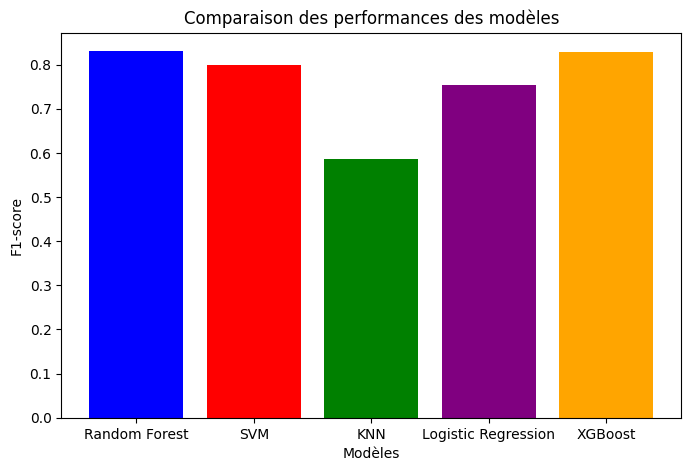

In [10]:
import matplotlib.pyplot as plt

model_names = []
f1_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"]
    model_names.append(name)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.bar(model_names, f1_scores, color=["blue", "red", "green", "purple", "orange"])
plt.xlabel("Modèles")
plt.ylabel("F1-score")
plt.title("Comparaison des performances des modèles")
plt.show()

### 10. **Réentraînement d’un modèle XGBoost**

Un modèle `XGBClassifier` est réentraîné sur les données complètes, pour l'utiliser ou pour faire une sauvegarde, par exemple on veut l'utiliser dans l'interface utilisateur de Streamlit.

In [11]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### 11. **Sauvegarde du modèle**

Cette cellule nous permet d'enregistrer:
- le modèle entraîné (`xgb_model`) dans `cosmetics_model.pkl`
- le vectoriseur TF-IDF dans `vectorizer.pkl`

Cela permet de les réutiliser sans réentraînement, on veut l'utiliser pour pouvoir insérer les ingrédients d'un produit et voir les résultats du modèle entraîné dans une application "Streamlit".

In [12]:
import pickle

# Sauvegarde du modèle
with open("cosmetics_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Sauvegarde du vectorizer TF-IDF
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)